<a href="https://www.kaggle.com/code/nooralrajab/car-t-cell-therapy-target-assessment-ipynb?scriptVersionId=191849550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Preparations 

In [1]:
input_directory="/kaggle/input"
output_directory="/kaggle/working"

In [2]:
!pip install scanpy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.8 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=8d8724e0e113cb1923abcf4be42a1ed375534536478f37cca8eeae8884c04ef0
  Stored in directory: /root/.cache/pip/wheels/e6/3e/d2/2325892469be5cc93dbc1dbe101d0fc48b4765adfb1973b583
Successfully built session-info


In [3]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.6 MB/s eta 0:00:0000:0100:010m


In [4]:
'''!pip install scDeepSort-v1.0-cu102.tar.gz'''

'!pip install scDeepSort-v1.0-cu102.tar.gz'

In [5]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 20.3 MB/s eta 0:00:0000:0100:01


In [6]:
!pip install protpy
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 739.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.7/373.7 kB 3.6 MB/s eta 0:00:00a 0:00:01


# Choose one subdataset

In [7]:
import pandas as pd
import scanpy as sc
import os

dataset="GSM8207629_pat3_pre"

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if dataset.split("_")[0] in os.path.join(dirname, filename):
            print(os.path.join(dirname, filename))

fn = '/kaggle/input/gse263932/'+dataset+'_barcodes.tsv/barcodes.tsv'
obs = pd.read_csv(fn, sep = '\t', index_col = 0, header = None)
obs.index.name = 'Barcode'
# d.columns = ['Gene Symbol']
# d = d.reset_index()
# d = d.set_index('Gene Symbol' )
display(obs)
#%%time
fn = '/kaggle/input/gse263932/'+dataset+'_features.tsv/features.tsv'
var = pd.read_csv(fn, sep = '\t', header = None, names=['Gene EnsemblID','Gene Symbol','Description'])
#var.set_index("Gene EnsemblID", drop=True, inplace=True)
#var.index.name = 'Gene EnsemblID'
#var.columns = ['Gene Symbol']
var = var.reset_index()
var = var.set_index('Gene Symbol' )
var.drop(var.columns[0], axis=1,inplace=True)
display(var)
#%%time

# Load the .mtx file using Scanpy's read_mtx function
adata = sc.read_mtx(input_directory+"/gse263932/"+dataset+"_matrix.mtx/matrix.mtx")
adata = adata.T

# Assign the row and column index to the AnnData object
adata.var = var
adata.obs = obs
isLogged=False # flag to prevent applying log scale twice
adata


/kaggle/input/gse263932/GSM8207629_pat3_pre_barcodes.tsv/barcodes.tsv
/kaggle/input/gse263932/GSM8207629_pat3_post_samples.csv/GSM8207629_pat3_post_samples.csv
/kaggle/input/gse263932/GSM8207629_pat3_pre_matrix.mtx/matrix.mtx
/kaggle/input/gse263932/GSM8207629_pat3_pre_features.tsv/features.tsv


""
Barcode
AAACCTGAGCGTTGCC-1
AAACCTGAGCTAACAA-1
AAACCTGAGTCAATAG-1
AAACCTGAGTTTAGGA-1
AAACCTGCACGGTGTC-1
...
TTTGTCACATCGTCGG-1
TTTGTCAGTGTGCCTG-1
TTTGTCATCTGATTCT-1


,Gene EnsemblID,Description
Gene Symbol,,
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC141272.1,ENSG00000277836,Gene Expression
AC023491.2,ENSG00000278633,Gene Expression
AC007325.1,ENSG00000276017,Gene Expression


AnnData object with n_obs × n_vars = 4266 × 36601
    var: 'Gene EnsemblID', 'Description'

# Preprocessing

... storing 'Description' as categorical


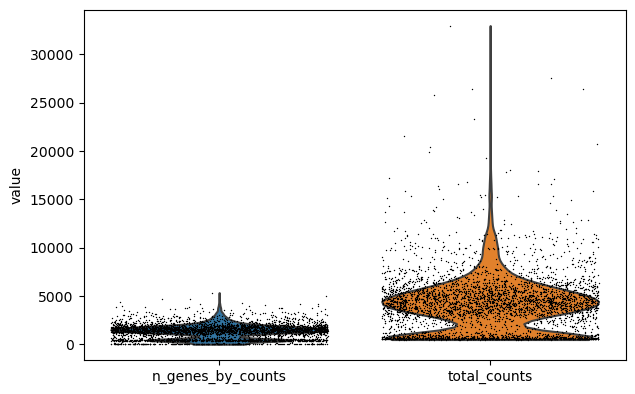

In [8]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.var_names_make_unique()
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4)

# adata.layers["counts"] is adata after filtering and normalization but before log scaling

In [9]:
!pip install --user magic-impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 890.1 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 2.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.9 MB/s eta 0:00:0000:0100:01


In [10]:
import scanpy.external as sce

# for exporting signature matrix
sc.pp.filter_cells(data=adata, min_counts=3, inplace=True)
#sc.pp.filter_cells(data=adata, max_counts=25000, inplace=True)
sc.pp.filter_cells(data=adata, min_genes=200, inplace=True)
sc.pp.filter_cells(data=adata, max_genes=2500, inplace=True)

if(isLogged==True):
    print("Data is already logged. Did not perform scaling and transformation again.")
        
else:
    sc.pp.normalize_total(adata, target_sum=1e4)

    adata.layers["counts"]=adata.X.copy()

    sc.pp.log1p(adata)
    sce.pp.magic(adata, name_list='all_genes', knn=5)
    #
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.var_names_make_unique()
    display(adata.to_df().describe())
    isLogged=True

/root/.local/lib/python3.7/site-packages/magic/magic.py:426: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


  Running MAGIC with `solver='exact'` on 36601-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/root/.local/lib/python3.7/site-packages/magic/utils.py:145: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(data)


Gene Symbol,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
count,3824.0,3824.0,3824.0,3824.000000,3824.0,3824.0,3824.000000,3824.0,3824.0,3824.0,...,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0
mean,0.0,0.0,0.0,0.001886,0.0,0.0,0.006410,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.002625,0.0,0.0,0.006061,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.000168,0.0,0.0,0.003125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.001185,0.0,0.0,0.004753,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.002519,0.0,0.0,0.007662,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.050492,0.0,0.0,0.095880,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


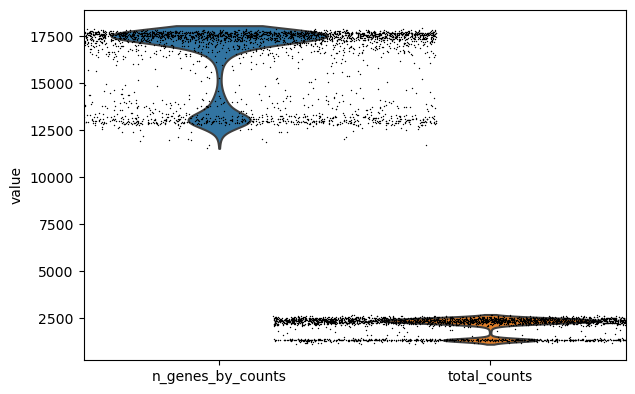

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.8)

In [12]:
print(len(set(adata.obs.index)))
adata.obs_names_make_unique()
adata.obs

3824


,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,n_genes
Barcode,,,,,,,,,,
AAACCTGAGCGTTGCC-1,17398,9.764168,2239.174316,7.714309,9.288869,16.672715,25.598519,38.955598,4403.0,1382
AAACCTGAGCTAACAA-1,17639,9.777924,2420.826416,7.792277,8.617719,15.392021,23.913678,37.063962,6284.0,1882
AAACCTGAGTCAATAG-1,12825,9.459230,1312.867676,7.180730,12.968606,21.714557,32.579757,47.656413,505.0,376
AAACCTGCACGGTGTC-1,17514,9.770813,2130.250977,7.664464,9.865494,17.641074,26.955067,40.313502,1636.0,740
AAACCTGGTCGGCATC-1,17604,9.775938,2361.950439,7.767666,8.875668,15.862168,24.495413,37.658985,2930.0,1224
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,13238,9.490922,1373.283936,7.225688,12.734859,21.394509,31.828776,46.271122,753.0,504
TTTGTCACATCGTCGG-1,17536,9.772068,2367.564209,7.770039,8.766908,15.650935,24.306044,37.523577,3535.0,1338
TTTGTCATCTGATTCT-1,17165,9.750686,2442.769775,7.801297,8.408130,15.100093,23.561926,36.712584,3993.0,1572


In [13]:
import celltypist
model = celltypist.models.Model.load(model = 'Healthy_COVID19_PBMC.pkl')
predictions=celltypist.annotate(adata, model=model, majority_voting=True)
#adata.obs_names_make_unique()
adata.obs["cell_type"]=predictions.predicted_labels["majority_voting"]


In [14]:
'''display(adata.obs.sum())'''

'display(adata.obs.sum())'

In [15]:
sc.pp.highly_variable_genes(adata)
adata.var

,Gene EnsemblID,Description,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
Gene Symbol,,,,,,,,,,,,
MIR1302-2HG,ENSG00000243485,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
FAM138A,ENSG00000237613,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
OR4F5,ENSG00000186092,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
AL627309.1,ENSG00000238009,Gene Expression,2937,0.001886,0.001884,23.195607,7.212893,2.105705,False,1.889674e-03,-5.598556,-1.267515
AL627309.3,ENSG00000239945,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
AC023491.2,ENSG00000278633,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
AC007325.1,ENSG00000276017,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000


In [16]:
adata.var[adata.var.highly_variable]

,Gene EnsemblID,Description,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
Gene Symbol,,,,,,,,,,,,
LINC01128,ENSG00000228794,Gene Expression,3824,0.039848,0.039074,0.000000,152.376862,5.032898,True,0.042832,-1.662192,2.964389
HES4,ENSG00000188290,Gene Expression,3768,0.019496,0.019308,1.464435,74.552582,4.324829,True,0.020380,-2.292359,2.286910
ISG15,ENSG00000187608,Gene Expression,3824,0.782935,0.578261,0.000000,2993.944336,8.004681,True,0.838719,-0.568816,1.394209
B3GALT6,ENSG00000176022,Gene Expression,3824,0.105989,0.100740,0.000000,405.301514,6.007095,True,0.106926,-3.901797,0.556636
CPTP,ENSG00000224051,Gene Expression,3824,0.078279,0.075366,0.000000,299.339386,5.704913,True,0.079043,-3.808882,0.656527
...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ATP6,ENSG00000198899,Gene Expression,3824,2.792465,1.333016,0.000000,10678.386719,9.276071,True,2.915147,2.393790,1.579857
MT-ND4,ENSG00000198886,Gene Expression,3824,2.823277,1.341108,0.000000,10796.209961,9.287043,True,2.926951,2.359514,1.519712
MT-ND5,ENSG00000198786,Gene Expression,3824,2.584073,1.276500,0.000000,9881.493164,9.198520,True,2.700846,2.384314,1.919958


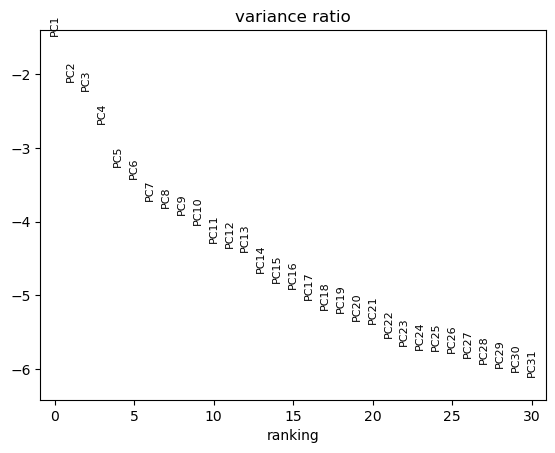

In [17]:
adata.raw=adata
adata=adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata,max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata,log=True)

In [18]:
'''counts_df=pd.DataFrame(adata.layers["counts"].toarray(), index=adata.obs_names, columns=adata.var_names)'''

'counts_df=pd.DataFrame(adata.layers["counts"].toarray(), index=adata.obs_names, columns=adata.var_names)'

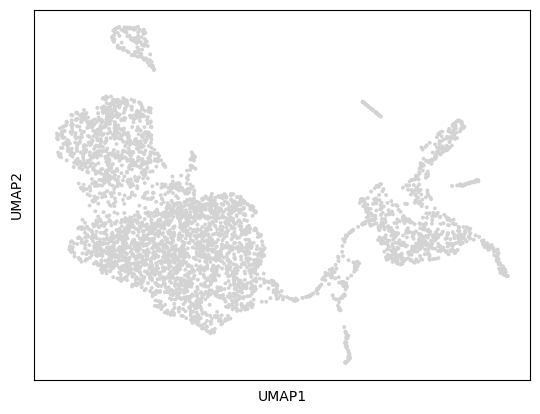

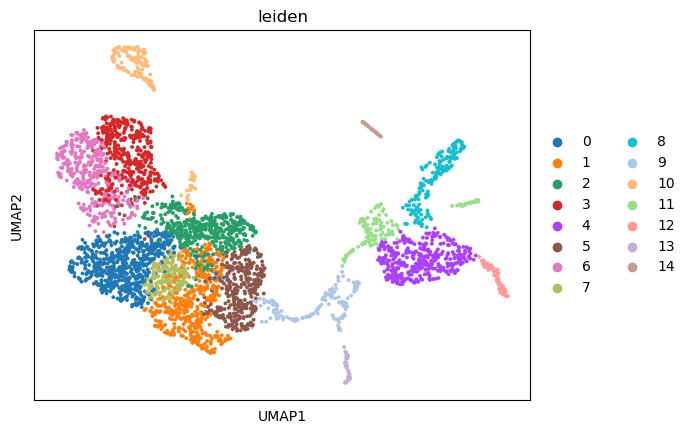

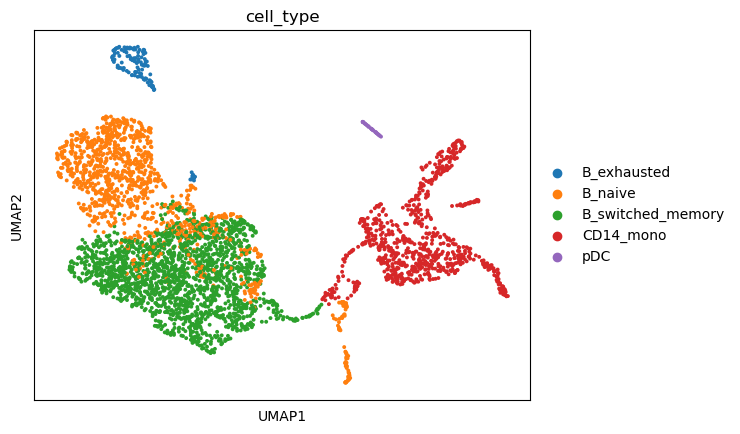

In [19]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=12)
sc.tl.umap(adata)
sc.pl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['leiden'])
sc.pl.umap(adata, color=['cell_type'])

# If you wanna go with unsupervised clustering and not CellTypist

In [20]:
'''adata.obs["cell_type"]=adata.obs["leiden"]'''

'adata.obs["cell_type"]=adata.obs["leiden"]'

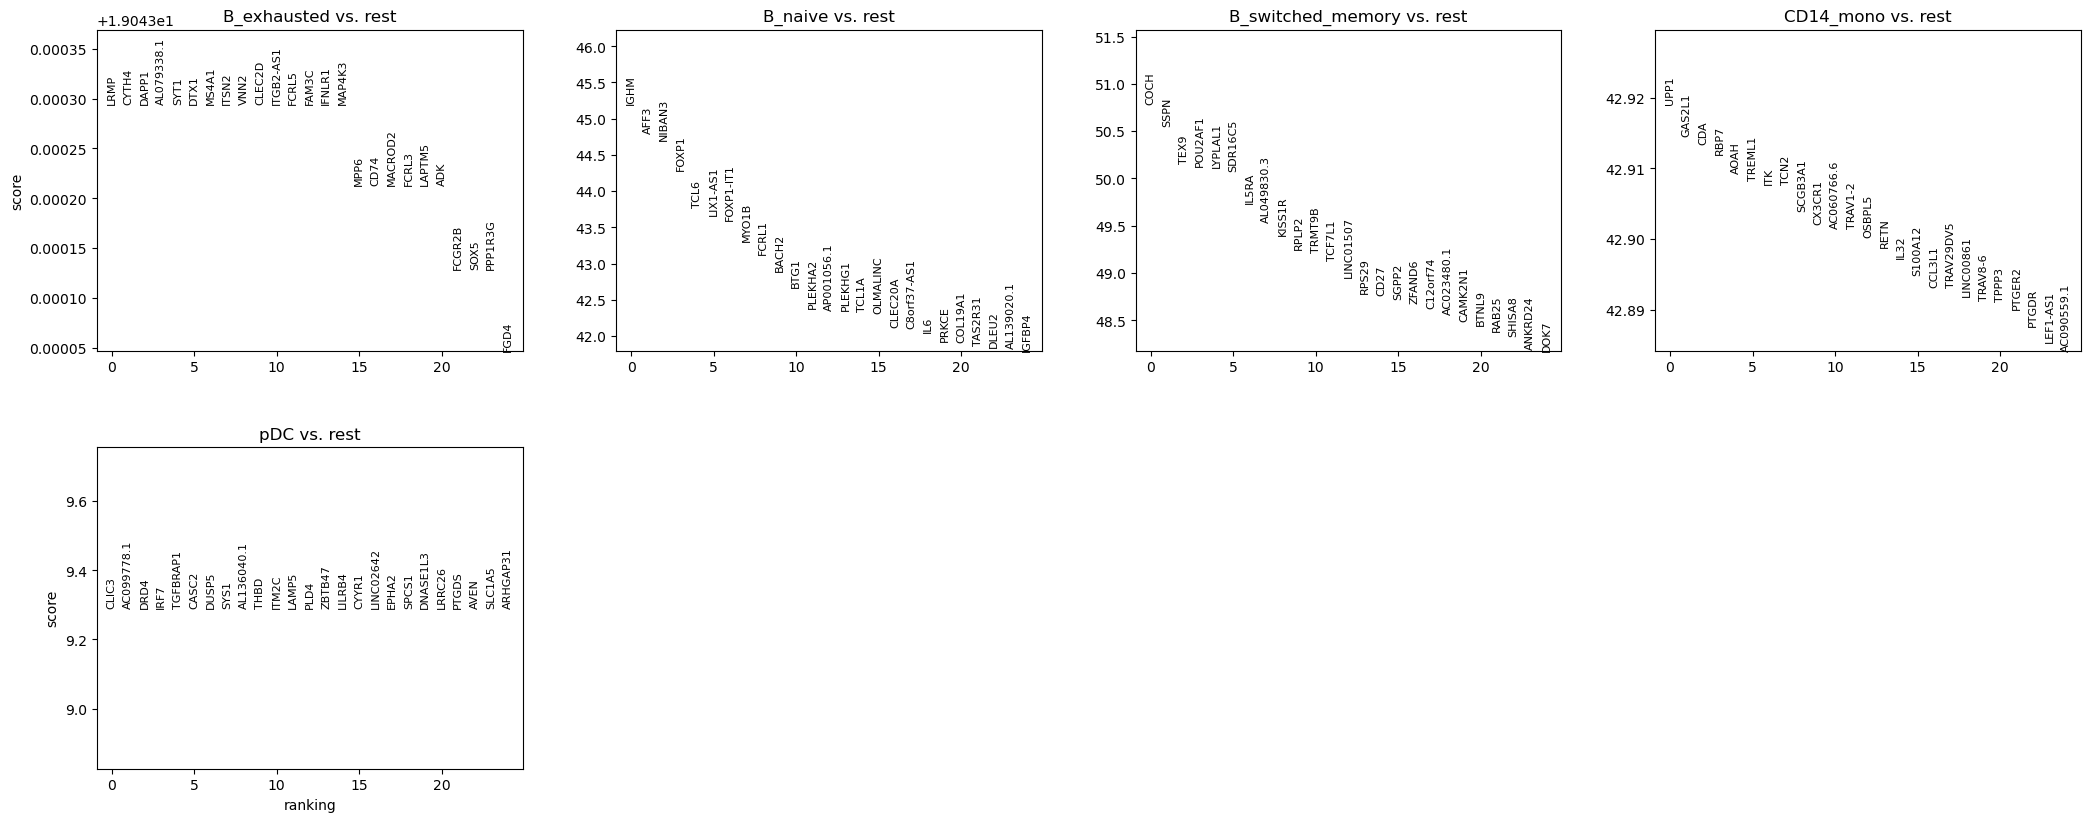

In [21]:
sc.tl.rank_genes_groups(adata, 'cell_type', method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

# Define a list of proteins that are considered surface markers

In [22]:
import pandas as pd

HPA_genes=pd.read_csv(input_directory+"/hpa-gene-synonyms-and-protein-classes/HPA_Protein_Classes.tsv", sep='\t')
classes=HPA_genes["Protein class"].values
gene_names=HPA_genes["Gene"].values
surf_markers=[]
for idx in HPA_genes.index:
    if('Plasma proteins' in classes[idx] or 'Predicted membrane proteins' in classes[idx] or 'CD markers' in classes[idx]):
        surf_markers.append(gene_names[idx])
surf_markers.pop(surf_markers.index("SELENOI")) # This gene causes problems when fetching descriptors
surf_markers.pop(surf_markers.index("SELENOK")) # This gene causes problems when fetching descriptors
surf_markers.pop(surf_markers.index("SELENOS")) # This gene causes problems when fetching descriptors
surf_markers=list(set(surf_markers))
print(surf_markers)
display(HPA_genes)

['PIGC', 'NUMBL', 'SLC22A23', 'CEND1', 'CSDE1', 'ALDH3A2', 'CTSB', 'ASPRV1', 'MCU', 'IL32', 'S100A12', 'CACNA2D1', 'N4BP2L2', 'SLAMF9', 'CELSR1', 'CLRN3', 'OR5K1', 'PORCN', 'CYP21A2', 'MFF', 'FBP1', 'HELZ', 'ADGRG2', 'TMEM167B', 'SH2D1A', 'CDH10', 'HGSNAT', 'THBS2', 'KRT8', 'ALDH3B2', 'ICAM5', 'TMEM74', 'TBC1D3E', 'AGPAT2', 'KSR2', 'TSPAN4', 'YWHAG', 'ENPP3', 'MASP1', 'APOA5', 'ABHD16A', 'CTNND1', 'WDR26', 'OR11H6', 'FFAR1', 'ENSG00000261832', 'VGF', 'ITGA1', 'CRP', 'IL13', 'NRN1', 'LAMTOR5', 'CNGA4', 'TMEM141', 'COL14A1', 'FGB', 'STAU1', 'KRT80', 'KCNK2', 'SRSF1', 'HM13', 'CERS3', 'GPR84', 'ABCD4', 'EEA1', 'ADORA2B', 'PLPP3', 'CKAP5', 'LRRC24', 'ZDHHC6', 'MVD', 'KRT1', 'HTR3D', 'THBS3', 'TMIGD1', 'PCDHA7', 'USH2A', 'WNT10A', 'SNAP47', 'SPATA31A3', 'OMA1', 'PRPH2', 'IGSF11', 'GYS1', 'TRBC1', 'AKAP12', 'ASPHD2', 'SLC17A4', 'ENTPD1', 'LARP4B', 'TMEM209', 'EIF4A1', 'CD63', 'PSIP1', 'TMEM225B', 'PFDN1', 'SLC24A2', 'CTDSPL', 'CDH1', 'FUT4', 'TLR5', 'CD180', 'PLXNA2', 'ATP5PF', 'ADIPOQ', 'AF

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Pathology prognostics - Lung cancer,Pathology prognostics - Melanoma,Pathology prognostics - Ovarian cancer,Pathology prognostics - Pancreatic cancer,Pathology prognostics - Prostate cancer,Pathology prognostics - Renal cancer,Pathology prognostics - Stomach cancer,Pathology prognostics - Testis cancer,Pathology prognostics - Thyroid cancer,Pathology prognostics - Urothelial cancer
0,A1BG,NaN,ENSG00000121410,Alpha-1-B glycoprotein,P04217,19,58345178-58353492,"Plasma proteins, Predicted intracellular prote...",NaN,NaN,...,unprognostic (1.09e-1),unprognostic (2.59e-1),unprognostic (2.10e-1),unprognostic (1.47e-2),unprognostic (1.37e-2),unprognostic (4.19e-5),unprognostic (2.37e-2),unprognostic (1.94e-1),unprognostic (1.72e-1),unprognostic (6.72e-2)
1,A1CF,"ACF, ACF64, ACF65, APOBEC1CF, ASP",ENSG00000148584,APOBEC1 complementation factor,Q9NQ94,10,50799409-50885675,Predicted intracellular proteins,mRNA processing,RNA-binding,...,unprognostic (7.38e-3),NaN,unprognostic (1.30e-2),unprognostic (2.46e-2),unprognostic (1.20e-1),unprognostic (1.90e-3),unprognostic (1.97e-2),unprognostic (2.77e-1),unprognostic (2.19e-2),unprognostic (8.50e-4)
2,A2M,"CPAMD5, FWP007, S863-7",ENSG00000175899,Alpha-2-macroglobulin,P01023,12,9067664-9116229,"Cancer-related genes, Candidate cardiovascular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,unprognostic (3.65e-2),unprognostic (2.38e-1),unprognostic (7.19e-2),unprognostic (4.71e-2),unprognostic (2.06e-2),unprognostic (1.28e-2),unprognostic (8.04e-3),unprognostic (2.32e-2),unprognostic (8.58e-2),unprognostic (9.03e-3)
3,A2ML1,"CPAMD9, FLJ25179, p170",ENSG00000166535,Alpha-2-macroglobulin like 1,A8K2U0,12,8822621-8887001,"Disease related genes, Predicted intracellular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,unprognostic (7.58e-3),unprognostic (2.63e-1),unprognostic (1.57e-1),unprognostic (1.15e-3),unprognostic (2.03e-1),unprognostic (1.06e-9),unprognostic (2.28e-1),unprognostic (3.07e-1),unprognostic (5.88e-2),unprognostic (2.42e-2)
4,A3GALT2,"A3GALT2P, IGB3S, IGBS3S",ENSG00000184389,"Alpha 1,3-galactosyltransferase 2",U3KPV4,1,33306766-33321098,"Enzymes, Predicted membrane proteins",Lipid metabolism,"Glycosyltransferase, Transferase",...,unprognostic (4.96e-2),unprognostic (6.83e-2),unprognostic (5.81e-2),unprognostic (1.23e-1),unprognostic (1.89e-1),unprognostic (4.90e-8),unprognostic (1.17e-1),NaN,unprognostic (1.12e-2),unprognostic (7.87e-2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20157,ZYG11A,ZYG11,ENSG00000203995,"Zyg-11 family member A, cell cycle regulator",Q6WRX3,1,52842511-52894998,Predicted intracellular proteins,Ubl conjugation pathway,NaN,...,unprognostic (2.34e-1),unprognostic (4.56e-2),unprognostic (2.06e-2),unprognostic (4.01e-2),unprognostic (1.01e-1),unprognostic (6.15e-3),unprognostic (2.95e-1),unprognostic (1.21e-1),unprognostic (3.07e-1),unprognostic (1.02e-1)
20158,ZYG11B,"FLJ13456, ZYG11",ENSG00000162378,"Zyg-11 family member B, cell cycle regulator",Q9C0D3,1,52726453-52827336,Predicted intracellular proteins,Ubl conjugation pathway,NaN,...,unprognostic (1.85e-1),unprognostic (4.84e-3),unprognostic (5.06e-2),unprognostic (2.76e-1),unprognostic (6.08e-2),prognostic favorable (9.80e-7),unprognostic (2.22e-1),unprognostic (3.37e-1),unprognostic (1.13e-1),unprognostic (9.57e-2)
20159,ZYX,NaN,ENSG00000159840,Zyxin,Q15942,7,143381295-143391111,"Plasma proteins, Predicted intracellular proteins","Cell adhesion, Host-virus interaction",NaN,...,unprognostic (1.66e-3),unprognostic (2.60e-1),unprognostic (4.22e-1),unprognostic (1.98e-1),unprognostic (2.43e-1),prognostic unfavorable (7.92e-5),unprognostic (1.39e-1),unprognostic (8.12e-2),unprognostic (1.95e-1),unprognostic (6.72e-2)
20160,ZZEF1,"FLJ10821, KIAA0399, ZZZ4",ENSG00000074755,Zinc finger ZZ-type and EF-hand domain contain...

# Histograms: Conditional Median and Weighted Median

In [23]:
def intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

# finding upregulated proteins in scRNA-seq. Lupus biomarkers adopted from https://www.frontiersin.org/journals/genetics/articles/10.3389/fgene.2022.941221/full
#upregProts_literature=['RSAD2', 'IFIT3', 'APOBEC3A', 'IFIT2', 'PARP9', 'DTX3L', 'PLSCR1', 'IFI35', 'ISG15', 'CMPK2', 'HERC5', 'GBP1', 'IFI27', 'STAT1', 'MX1', 'IRF7', 'OAS1', 'OAS2', 'OAS3', 'OASL', 'IFIH1', 'SIGLEC1', 'LGALS9', 'BST2']

#https://pubmed.ncbi.nlm.nih.gov/37614232/
upregProts_literature=['IFI44L', 'ISG15', 'ITGB2']

upregProts=intersection(upregProts_literature, adata.var.index)
'''for elem in adata.var.index:
    for p in upregProts:
        if(p == elem):
            print(elem)'''
print("Disease related proteins considered:")
print(upregProts)

Disease related proteins considered:
['ITGB2', 'ISG15']


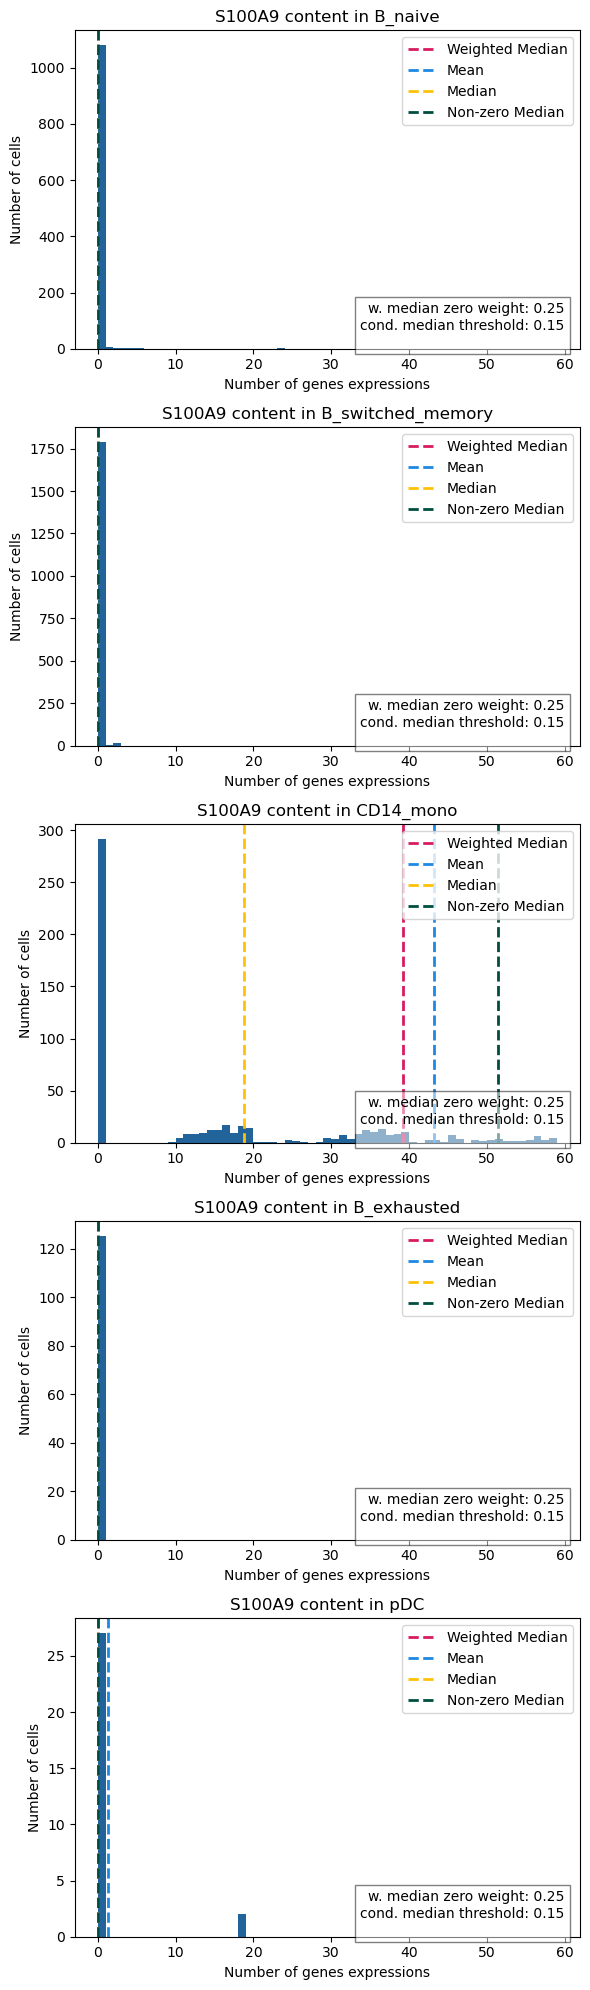

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

upregProt = "S100A9"
zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

def weighted_median(data, weights):
    """
    Compute the weighted median of data.
    
    Parameters:
    data (array-like): Input data.
    weights (array-like): Weights for each data point.
    
    Returns:
    float: Weighted median.
    """
    data, weights = np.array(data), np.array(weights)
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weight = np.cumsum(sorted_weights)
    cutoff = 0.5 * np.sum(sorted_weights)
    return sorted_data[np.where(cumulative_weight >= cutoff)[0][0]]

def conditional_non_zero_median(data, threshold=0.15):
    """
    Compute the median of non-zero values if they constitute more than 
    a given threshold proportion of the total population.
    
    Parameters:
    data (array-like): Input data.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    float: Median of non-zero values if condition is met, otherwise NaN.
    """
    non_zero_vals = data[data > 0]
    if len(non_zero_vals) / len(data) > threshold:
        return np.median(non_zero_vals)
    else:
        return np.nan
    
def conditional_non_zero_median_df(data, threshold=0.15):
    """
    Compute the median of non-zero values for each column in a DataFrame
    if they constitute more than a given threshold proportion of the total population.
    
    Parameters:
    data (DataFrame): Input DataFrame.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    Series: Medians of non-zero values for each column if condition is met, otherwise NaN.
    """
    medians = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            non_zero_vals = data[col][data[col] > 0]
            if len(non_zero_vals) / len(data[col]) > threshold:
                medians[col] = np.median(non_zero_vals)
            else:
                medians[col] = np.nan
        else:
            medians[col] = np.nan
    return pd.Series(medians)


# Uses gene counts per 10,000 cells for score calculation
cellMatrix = pd.DataFrame(adata.layers["counts"].toarray(), index=adata.obs_names, columns=adata.var_names)
cellMatrix['cell_type'] = adata.obs['cell_type']
cellTypes = list(cellMatrix['cell_type'].unique())
fig, axs = plt.subplots(nrows=len(cellTypes), ncols=1, figsize=(6, 4 * len(cellTypes)))

for i, cell_t in enumerate(cellTypes):
    vals = cellMatrix.loc[cellMatrix['cell_type'] == cell_t, upregProt]
    
    # Assign weights: give a lower weight to zero values
    weights = np.ones_like(vals)
    weights[vals == 0] = zero_weight  # Assign a weight of 0.25 to zero values
    
    axs[i].hist(vals, bins=range(0, 60), color='#226399')
    axs[i].set_title(f"{upregProt} content in {cell_t}")
    axs[i].axvline(weighted_median(vals, weights), color='#D81B60', linestyle='dashed', linewidth=2, label='Weighted Median')
    axs[i].axvline(vals.mean(), color='#1E88E5', linestyle='dashed', linewidth=2, label='Mean')
    axs[i].axvline(vals.median(), color='#FFC107', linestyle='dashed', linewidth=2, label='Median')
    non_zero_median=conditional_non_zero_median(vals, threshold=conditional_threshold)
    if not np.isnan(non_zero_median):
        axs[i].axvline(non_zero_median, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    else:
        axs[i].axvline(0, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel("Number of genes expressions")
    axs[i].set_ylabel("Number of cells")
    axs[i].text(60, 
                0, 
                f"w. median zero weight: {zero_weight:.2f}\ncond. median threshold: {conditional_threshold:.2f}\n", 
                fontsize = 10, 
                bbox = dict(facecolor = 'white', alpha = 0.5),
                horizontalalignment='right',
                verticalalignment='bottom')

plt.tight_layout()
plt.savefig("Mean and Median Modifications.png")
plt.show()


In [25]:
cellMatrix.iloc[:,0:len(cellMatrix.columns)-1]=cellMatrix.iloc[:,0:len(cellMatrix.columns)-1].clip(0)
cellMatrix

Gene Symbol,LINC01128,HES4,ISG15,B3GALT6,CPTP,MIB2,CDK11B,SLC35E2B,CDK11A,RER1,...,VBP1,TMLHE,MT-ND1,MT-ND2,MT-ATP6,MT-ND4,MT-ND5,MT-ND6,AC233755.1,cell_type
Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGTTGCC-1,0.0,0.0,9.084715,0.0,0.000000,0.0,2.271179,0.000000,0.000000,0.000000,...,0.0,0.000000,27.254145,18.169430,15.898251,43.152397,18.169430,6.813536,0.0,B_naive
AAACCTGAGCTAACAA-1,0.0,0.0,1.591343,0.0,1.591343,0.0,0.000000,3.182686,0.000000,0.000000,...,0.0,0.000000,12.730744,23.870146,11.139401,17.504774,20.687460,30.235518,0.0,B_switched_memory
AAACCTGAGTCAATAG-1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,19.801979,19.801979,0.000000,0.000000,0.000000,0.000000,0.0,CD14_mono
AAACCTGCACGGTGTC-1,0.0,0.0,6.112470,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,36.674820,61.124695,79.462105,42.787289,12.224939,79.462105,0.0,B_switched_memory
AAACCTGGTCGGCATC-1,0.0,0.0,0.000000,0.0,3.412969,0.0,0.000000,3.412969,0.000000,3.412969,...,0.0,0.000000,34.129692,17.064846,27.303753,20.477814,17.064846,20.477814,0.0,B_switched_memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,0.0,0.0,13.280212,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,13.280212,13.280212,0.000000,13.280212,0.000000,0.0,CD14_mono
TTTGTCACATCGTCGG-1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,2.828854,25.459688,14.144272,8.486563,11.315417,25.459688,2.828854,0.0,B_naive
TTTGTCATCTGATTCT-1,0.0,0.0,2.504383,0.0,0.000000,0.0,0.000000,2.504383,0.000000,0.000000,...,0.0,0.000000,17.530678,20.035061,25.043827,10.017530,25.043827,12.521914,0.0,B_naive


In [26]:
'''zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

for CT in cellTypes:
    means=[]
    medians=[]
    w_medians=[]
    c_medians=[]
    temp_cellMatrix=cellMatrix.loc[cellMatrix['cell_type']==CT,:].copy()
    temp_cellMatrix.drop("cell_type", inplace=True, axis=1)
    for gene in temp_cellMatrix.columns:
        print(CT+">>"+gene)
        # Assign weights: give a lower weight to zero values
        weights = np.ones_like(temp_cellMatrix[gene])
        weights[temp_cellMatrix[gene] == 0] = zero_weight  # Assign a weight of 0.25 to zero values
        means.append(temp_cellMatrix[gene].mean())
        medians.append(temp_cellMatrix[gene].median())
        w_medians.append(weighted_median(temp_cellMatrix[gene], weights))
        non_zero_median=conditional_non_zero_median(temp_cellMatrix[gene], threshold=conditional_threshold)
        if not np.isnan(non_zero_median):
            c_medians.append(non_zero_median)
        else:
            c_medians.append(0)
    results=pd.DataFrame({"Mean": means, "Median": medians, "W_Medians": w_medians, "C_Medians": c_medians}, index=temp_cellMatrix.columns)
    results.to_excel(CT+"_stats.xlsx")
    display(results.describe())
    
import zipfile
import os

zipfile_name="Cell_Type_Stats.zip"
directory = output_directory+"/"  # The directory to search in

# Find the files that contain the search string
files_to_zip = [f for f in os.listdir(directory) if "_stats" in f and not "zip" in f]

# Create the zip file and add the filtered files
with zipfile.ZipFile(zipfile_name, 'w') as zipf:
    for file in files_to_zip:
        zipf.write(os.path.join(directory, file), arcname=file)
'''

'zero_weight = 0.25 # for weighted median\nconditional_threshold=0.15 # for conditional non zero median\n\nfor CT in cellTypes:\n    means=[]\n    medians=[]\n    w_medians=[]\n    c_medians=[]\n    temp_cellMatrix=cellMatrix.loc[cellMatrix[\'cell_type\']==CT,:].copy()\n    temp_cellMatrix.drop("cell_type", inplace=True, axis=1)\n    for gene in temp_cellMatrix.columns:\n        print(CT+">>"+gene)\n        # Assign weights: give a lower weight to zero values\n        weights = np.ones_like(temp_cellMatrix[gene])\n        weights[temp_cellMatrix[gene] == 0] = zero_weight  # Assign a weight of 0.25 to zero values\n        means.append(temp_cellMatrix[gene].mean())\n        medians.append(temp_cellMatrix[gene].median())\n        w_medians.append(weighted_median(temp_cellMatrix[gene], weights))\n        non_zero_median=conditional_non_zero_median(temp_cellMatrix[gene], threshold=conditional_threshold)\n        if not np.isnan(non_zero_median):\n            c_medians.append(non_zero_median

In [27]:
from Bio import SeqIO
import protpy as protpy
import numpy as np

def get_fasta(geneList):
    gene_to_seq = {}
    sequences=[]
    geneList=list(geneList)
    successfulGenes=[]

    for record in SeqIO.parse(input_directory+"/uniprot-swissprot-fasta/uniprot_sprot.fasta", "fasta"):
        org=record.name.split("|")[2].split("_")[1]
        try:
            gene=record.description.split("GN=")[1].split(" ")[0]
        except Exception as e:
            print(e)
            gene=record.name.split("|")[2].split("_")[0]
        if(org == "HUMAN" and gene in geneList):
            gene_to_seq[gene]=record.seq
            #print(gene_to_seq)
    for gene in geneList:
        try:
            new_seq=gene_to_seq[gene]
            sequences.append(new_seq)
            successfulGenes.append(gene)
        except Exception as e:
            #print(e)
    return sequences, successfulGenes

prots=[g for g in surf_markers if g in list(adata.var_names)]
seqs, genes_found=get_fasta(prots) # use genes in common between surface markers and dataset
desc_lookup=pd.DataFrame({"Gene": genes_found, "FASTA": seqs})
descList=[]
for i, seq in enumerate(seqs):
    #try:
    descList.append(protpy.dipeptide_composition(str(seq)))
    #except:
        #print("Error with gene "+genes_found[i]+" sequence "+seq)
desc_lookup=desc_lookup.join(pd.DataFrame(np.squeeze(descList)))
desc_lookup.drop("FASTA", inplace=True, axis=1)
desc_lookup.set_index("Gene", inplace=True)

#desc_lookup.drop_duplicates(subset='Gene', inplace=True, axis=0)
display(desc_lookup)

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Gene,,,,,,,,,,,,,,,,,,,,,
PIGC,0.34,0.34,0.34,0.34,0.68,0.00,0.00,1.01,0.00,1.01,...,0.34,0.00,0.00,0.34,0.00,0.00,0.00,1.01,0.34,0.00
CTSB,0.00,0.00,0.00,0.89,0.59,0.59,0.30,0.59,0.00,0.00,...,0.00,0.59,0.30,0.30,0.00,1.18,0.00,0.30,0.59,0.00
IL32,0.43,0.43,0.00,0.86,0.00,0.00,0.00,0.43,0.00,1.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.43
S100A12,1.10,0.00,0.00,0.00,0.00,0.00,1.10,1.10,0.00,1.10,...,0.00,0.00,0.00,0.00,0.00,1.10,0.00,0.00,0.00,0.00
FBP1,0.30,0.00,0.59,0.00,0.00,1.19,0.30,0.89,0.00,0.59,...,0.00,0.00,0.30,0.00,0.30,0.30,0.00,0.89,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTMR1,0.90,0.00,0.60,0.30,0.60,0.75,0.00,0.30,0.15,0.45,...,0.00,0.00,0.60,0.00,0.15,0.15,0.15,0.15,0.00,0.30
TMEM248,0.00,0.32,0.00,0.64,0.32,0.00,0.32,0.64,0.00,1.28,...,0.00,0.32,0.00,0.00,0.00,0.96,0.00,0.00,0.00,0.00
USP25,0.47,0.09,0.19,0.38,0.38,0.19,0.00,0.38,0.28,0.76,...,0.09,0.09,0.09,0.19,0.57,0.19,0.00,0.09,0.09,0.09


In [28]:
cellMatrix

Gene Symbol,LINC01128,HES4,ISG15,B3GALT6,CPTP,MIB2,CDK11B,SLC35E2B,CDK11A,RER1,...,VBP1,TMLHE,MT-ND1,MT-ND2,MT-ATP6,MT-ND4,MT-ND5,MT-ND6,AC233755.1,cell_type
Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGTTGCC-1,0.0,0.0,9.084715,0.0,0.000000,0.0,2.271179,0.000000,0.000000,0.000000,...,0.0,0.000000,27.254145,18.169430,15.898251,43.152397,18.169430,6.813536,0.0,B_naive
AAACCTGAGCTAACAA-1,0.0,0.0,1.591343,0.0,1.591343,0.0,0.000000,3.182686,0.000000,0.000000,...,0.0,0.000000,12.730744,23.870146,11.139401,17.504774,20.687460,30.235518,0.0,B_switched_memory
AAACCTGAGTCAATAG-1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,19.801979,19.801979,0.000000,0.000000,0.000000,0.000000,0.0,CD14_mono
AAACCTGCACGGTGTC-1,0.0,0.0,6.112470,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,36.674820,61.124695,79.462105,42.787289,12.224939,79.462105,0.0,B_switched_memory
AAACCTGGTCGGCATC-1,0.0,0.0,0.000000,0.0,3.412969,0.0,0.000000,3.412969,0.000000,3.412969,...,0.0,0.000000,34.129692,17.064846,27.303753,20.477814,17.064846,20.477814,0.0,B_switched_memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,0.0,0.0,13.280212,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,13.280212,13.280212,0.000000,13.280212,0.000000,0.0,CD14_mono
TTTGTCACATCGTCGG-1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,2.828854,25.459688,14.144272,8.486563,11.315417,25.459688,2.828854,0.0,B_naive
TTTGTCATCTGATTCT-1,0.0,0.0,2.504383,0.0,0.000000,0.0,0.000000,2.504383,0.000000,0.000000,...,0.0,0.000000,17.530678,20.035061,25.043827,10.017530,25.043827,12.521914,0.0,B_naive


In [29]:
import pickle

model='ridge'

def get_abundances(transcripts_per_gene, model='ridge'): # takes a dataframe where indicies are gene names and one column (transcripts)
    X_desc=desc_lookup.copy()
    X_desc=X_desc.mul(transcripts_per_gene, axis=0)
    transcripts_per_gene=transcripts_per_gene.to_frame()
    X=transcripts_per_gene.join(X_desc, how='inner') # based on index
    if(model=='ridge'):
        model_file = open(input_directory+"/protein_abundance_predictor/scikitlearn/ridge/2/Ridge_Protein_Abundance_Predictor.sav",'rb') # Ridge
    else:
        model_file = open(input_directory+"/protein_abundance_predictor/scikitlearn/default/1/Protein_Abundance_Predictor.sav",'rb') # Random Forest
    model = pickle.load(model_file)
    model_file.close()
    y=model.predict(X)
    return y

cellMatrix = adata.to_df()
cellMatrix_surf = cellMatrix.loc[:, genes_found].copy() # only keep genes found in fasta and surf_markers
cellMatrix_surf['cell_type'] = adata.obs['cell_type']
cellMatrix['cell_type'] = adata.obs['cell_type']

medianList=[]
for cell_t in cellTypes:
    #temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    medianList.append(cellMatrix_surf.loc[cellMatrix_surf['cell_type']==cell_t].median()) # averaging uses conditional non zero median of cell counts
    #sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
#averagedMatrix.index=cellTypes
medianDf=pd.DataFrame(medianList, columns=cellMatrix_surf.columns, index=cellTypes)
medianDf=medianDf.clip(0)
#medianDf["cell_type"]=cellTypes
medianDf.drop("cell_type", inplace=True, axis=1)
medianDf=medianDf.T

abundanceMatrix=[]
abundanceMatrix_trueZero=[]

for cell_t in cellTypes:
    transcripts_col=medianDf[cell_t].rename("Transcripts")
    abund_row=get_abundances(transcripts_col, model)
    abund_row_trueZero=abund_row.copy()
    abund_row_trueZero[transcripts_col==0]=0
    abundanceMatrix.append(abund_row)
    abundanceMatrix_trueZero.append(abund_row_trueZero)
    
abundanceMatrix=pd.DataFrame(abundanceMatrix, index=cellTypes, columns=genes_found)
abundanceMatrix_trueZero=pd.DataFrame(abundanceMatrix_trueZero, index=cellTypes, columns=genes_found)
abundanceMatrix.clip(0,inplace=True)
abundanceMatrix_trueZero.clip(0,inplace=True)
display(abundanceMatrix)
display(abundanceMatrix_trueZero)

,PIGC,CTSB,IL32,S100A12,FBP1,HELZ,TSPAN4,HM13,ABCD4,EEA1,...,LHFPL2,PLSCR3,NME4,COQ7,TOMM70,MTMR1,TMEM248,USP25,JAML,IL7R
B_naive,0.000000,0.000000,0.000000,0.000000,0.000000,1.177055,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.662173,3.398889,0.000000,0.355662,2.006351,0.498390,0.000000,0.000000
B_switched_memory,0.888814,0.000000,0.018086,0.105243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,2.241666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257394,0.015482
CD14_mono,0.000000,2.406339,0.000000,2.456211,2.463594,0.000000,2.058679,0.518104,0.000000,0.236250,...,0.00000,0.291934,0.000000,0.000000,0.000000,0.000000,0.036811,0.000000,5.527045,0.252459
B_exhausted,0.000000,2.814692,0.845649,1.824117,2.362001,0.000000,5.096083,0.000000,3.181214,26.130797,...,0.00000,0.000000,6.777821,0.000000,0.322695,1.151546,1.025954,0.307514,4.107094,0.643637
pDC,0.000000,10.563515,0.000000,0.000000,0.000000,0.000000,0.000000,12.838368,30.540532,0.000000,...,36.45545,0.000000,3.262162,2.947515,0.000000,6.835664,0.000000,0.000000,0.000000,0.000000


,PIGC,CTSB,IL32,S100A12,FBP1,HELZ,TSPAN4,HM13,ABCD4,EEA1,...,LHFPL2,PLSCR3,NME4,COQ7,TOMM70,MTMR1,TMEM248,USP25,JAML,IL7R
B_naive,0.000000,0.000000,0.000000,0.000000,0.000000,1.177055,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.662173,3.398889,0.000000,0.355662,2.006351,0.498390,0.000000,0.000000
B_switched_memory,0.888814,0.000000,0.018086,0.105243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,2.241666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257394,0.015482
CD14_mono,0.000000,2.406339,0.000000,2.456211,2.463594,0.000000,2.058679,0.518104,0.000000,0.236250,...,0.00000,0.291934,0.000000,0.000000,0.000000,0.000000,0.036811,0.000000,5.527045,0.252459
B_exhausted,0.000000,2.814692,0.845649,1.824117,2.362001,0.000000,5.096083,0.000000,3.181214,26.130797,...,0.00000,0.000000,6.777821,0.000000,0.322695,1.151546,1.025954,0.307514,4.107094,0.643637
pDC,0.000000,10.563515,0.000000,0.000000,0.000000,0.000000,0.000000,12.838368,30.540532,0.000000,...,36.45545,0.000000,3.262162,2.947515,0.000000,6.835664,0.000000,0.000000,0.000000,0.000000


# Heatmap

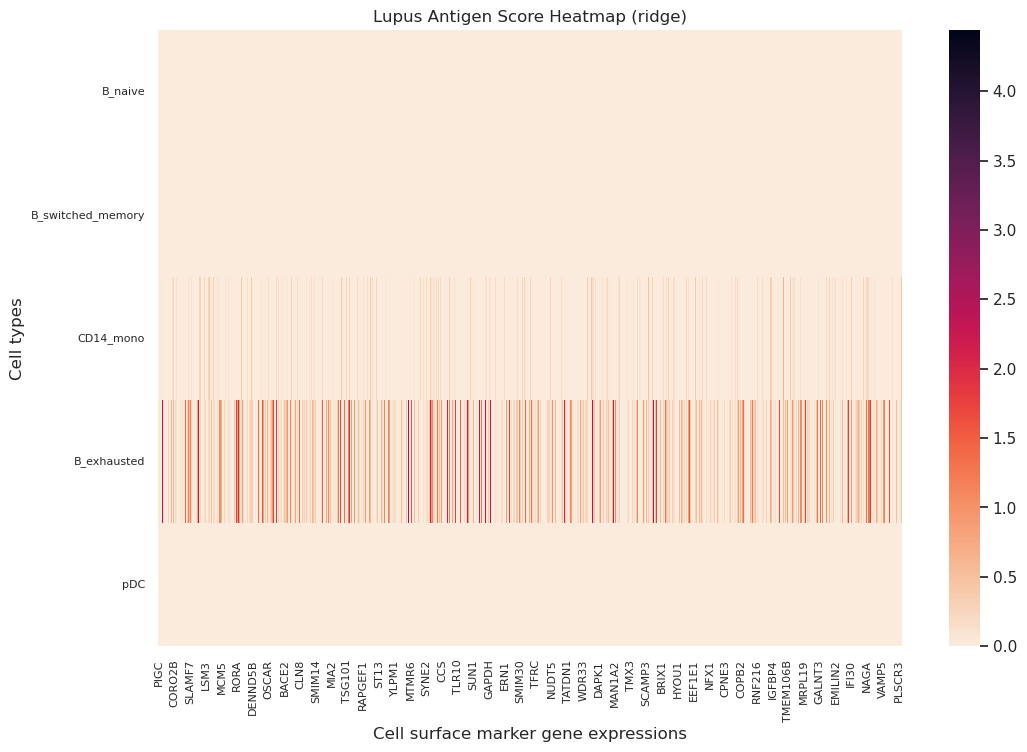

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

averagedMatrix=[]
sums=[]
for cell_t in cellTypes:
    temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    averagedMatrix.append(cellMatrix.loc[cellMatrix['cell_type']==cell_t].median())
    sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
averagedMatrix=pd.DataFrame(averagedMatrix)
averagedMatrix.index=cellTypes
averagedMatrix.clip(0, inplace=True)
sums=sums/sum(sums)
#display(averagedMatrix['FGR'])
#upregProts_effective=averagedMatrix.loc[:,upregProts].sum(axis=1, numeric_only=True)/len(upregProts)
upregProts_effective=averagedMatrix.loc[:,upregProts].mean(axis=1)
#print(upregProts_effective)
#scoreMatrix=abundanceMatrix.copy()
scoreMatrix=abundanceMatrix.mul(upregProts_effective, axis=0) # multiply by upregulated protein presence in each cell type
scoreMatrix=scoreMatrix.mul(sums, axis=0)
#scoreMatrix=scoreMatrix[genes_found]
#display(abundanceMatrix)
#display(scoreMatrix)
# Filter averagedMatrix to keep only columns that are in surf_markers
#abundanceMatrix = averagedMatrix.loc[:, averagedMatrix.columns.isin(surf_markers)].copy()

#display(markers_averagedMatrix)
sns.set_theme(style="whitegrid", palette="pastel")
fig,ax=plt.subplots(figsize=(12,8))
#norm=LogNorm(vmin=1/10000, vmax=10)
scoreMatrix=scoreMatrix.dropna(axis=1, how='all')
sns_plot=sns.heatmap(scoreMatrix,ax=ax,cmap='rocket_r')

ax.set_title(f"Lupus Antigen Score Heatmap ({model})")
ax.set(xlabel='Cell surface marker gene expressions', ylabel='Cell types')
#ax.set_xticks(range(len(nonzero_markers_averagedMatrix.columns))) 

#ax.set_xticklabels(nonzero_markers_averagedMatrix.columns) 
sns_plot.tick_params(labelsize=8)
fig.savefig(dataset+f"_heatmap ({model}).png", bbox_inches='tight')

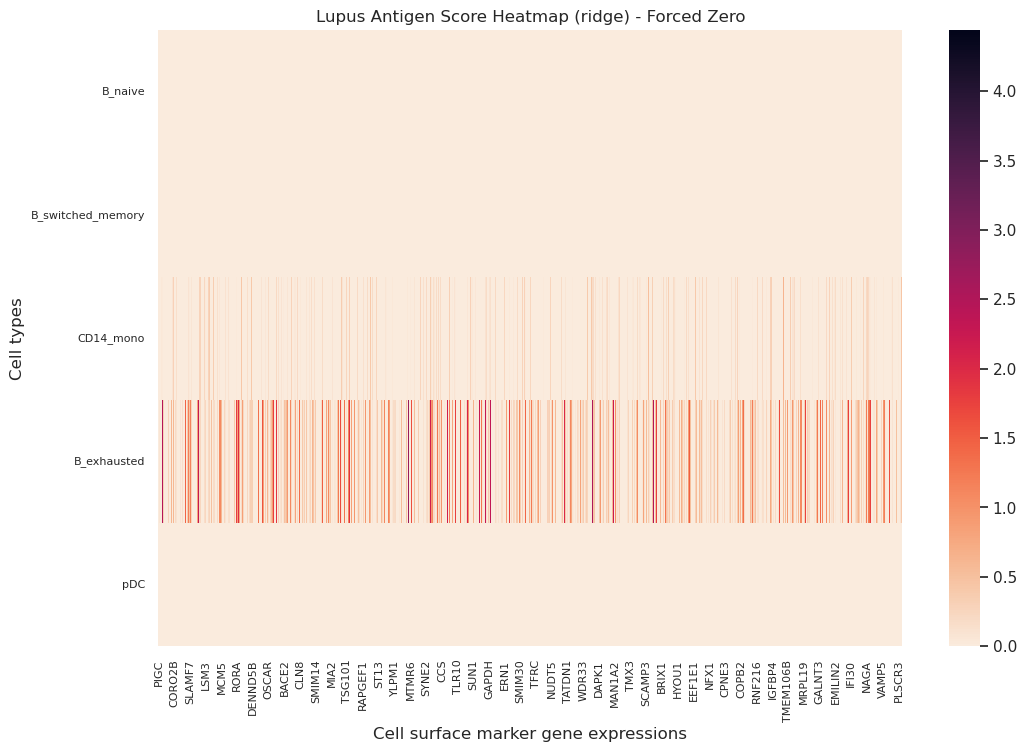

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

averagedMatrix=[]
sums=[]
for cell_t in cellTypes:
    temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    averagedMatrix.append(cellMatrix.loc[cellMatrix['cell_type']==cell_t].median())
    sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
averagedMatrix=pd.DataFrame(averagedMatrix)
averagedMatrix.index=cellTypes
averagedMatrix.clip(0, inplace=True)
sums=sums/sum(sums)
#display(averagedMatrix['FGR'])
#upregProts_effective=averagedMatrix.loc[:,upregProts].sum(axis=1, numeric_only=True)/len(upregProts)
upregProts_effective=averagedMatrix.loc[:,upregProts].mean(axis=1)
#print(upregProts_effective)
#scoreMatrix=abundanceMatrix.copy()
scoreMatrix=abundanceMatrix_trueZero.mul(upregProts_effective, axis=0) # multiply by upregulated protein presence in each cell type
scoreMatrix=scoreMatrix.mul(sums, axis=0)
#scoreMatrix=scoreMatrix[genes_found]
#display(abundanceMatrix)
#display(scoreMatrix)
# Filter averagedMatrix to keep only columns that are in surf_markers
#abundanceMatrix = averagedMatrix.loc[:, averagedMatrix.columns.isin(surf_markers)].copy()

#display(markers_averagedMatrix)
sns.set_theme(style="whitegrid", palette="pastel")
fig,ax=plt.subplots(figsize=(12,8))
#norm=LogNorm(vmin=1/10000, vmax=10)
scoreMatrix=scoreMatrix.dropna(axis=1, how='all')
sns_plot=sns.heatmap(scoreMatrix,ax=ax,cmap='rocket_r')

ax.set_title(f"Lupus Antigen Score Heatmap ({model}) - Forced Zero")
ax.set(xlabel='Cell surface marker gene expressions', ylabel='Cell types')
#ax.set_xticks(range(len(nonzero_markers_averagedMatrix.columns))) 

#ax.set_xticklabels(nonzero_markers_averagedMatrix.columns) 
sns_plot.tick_params(labelsize=8)
fig.savefig(dataset+f"_trueZero_heatmap ({model}).png", bbox_inches='tight')

# Targets already used in CAR T-cell therapy

In [32]:
repurposableTargets = [ # Targets mentioned in Therapeutic Target Database
    "CD80",
    "TNFRSF17",
    "CD22",
    "CD19",
    "NY-ESO-1",
    "CD66e",
    "CD27-L",
    "CLDN18",
    "CD137",
    "CD38",
    "DLL3",
    "EPHA2",
    "EGFR",
    "EGFR vIII",
    "EBV LMP1",
    "HER2",
    "GPRC5D",
    "GCPII",
    "GPC3",
    "PMEL",
    "CD34",
    "ICAM1",
    "IL3RA",
    "CD20",
    "TNFRSF8",
    "MAGEA1",
    "MAGEA4",
    "MSLN",
    "MUC1",
    "CD33",
    "CD371",
    "NCAM1",
    "L1CAM",
    "ROR1",
    "ROR2",
    "MME",
    "KLRK1",
    "PD-L1",
    "PROM1",
    "PSCA",
    "MET",
    "CS1",
    "SDC1",
    "CD7",
    "TRBC1",
    "CD4",
    "TRAIL-R2",
    "EPCAM",
    "KIT"
]

# Violin plots

In [33]:
abundanceMatrix

,PIGC,CTSB,IL32,S100A12,FBP1,HELZ,TSPAN4,HM13,ABCD4,EEA1,...,LHFPL2,PLSCR3,NME4,COQ7,TOMM70,MTMR1,TMEM248,USP25,JAML,IL7R
B_naive,0.000000,0.000000,0.000000,0.000000,0.000000,1.177055,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.662173,3.398889,0.000000,0.355662,2.006351,0.498390,0.000000,0.000000
B_switched_memory,0.888814,0.000000,0.018086,0.105243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,2.241666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257394,0.015482
CD14_mono,0.000000,2.406339,0.000000,2.456211,2.463594,0.000000,2.058679,0.518104,0.000000,0.236250,...,0.00000,0.291934,0.000000,0.000000,0.000000,0.000000,0.036811,0.000000,5.527045,0.252459
B_exhausted,0.000000,2.814692,0.845649,1.824117,2.362001,0.000000,5.096083,0.000000,3.181214,26.130797,...,0.00000,0.000000,6.777821,0.000000,0.322695,1.151546,1.025954,0.307514,4.107094,0.643637
pDC,0.000000,10.563515,0.000000,0.000000,0.000000,0.000000,0.000000,12.838368,30.540532,0.000000,...,36.45545,0.000000,3.262162,2.947515,0.000000,6.835664,0.000000,0.000000,0.000000,0.000000


In [34]:
cellMatrix

Gene Symbol,LINC01128,HES4,ISG15,B3GALT6,CPTP,MIB2,CDK11B,SLC35E2B,CDK11A,RER1,...,VBP1,TMLHE,MT-ND1,MT-ND2,MT-ATP6,MT-ND4,MT-ND5,MT-ND6,AC233755.1,cell_type
Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGTTGCC-1,-0.028111,-0.278945,0.156590,0.940202,-1.361527,-0.320759,-0.346561,-1.347875,-0.795090,-0.940543,...,1.322521,0.315618,0.128660,0.255612,0.286833,0.361258,0.040511,0.028018,-0.108512,B_naive
AAACCTGAGCTAACAA-1,-0.463749,0.050104,-0.441037,-0.413016,1.500149,0.454870,-0.206389,0.686481,0.057546,0.273836,...,-0.539540,-0.206142,-0.004758,-0.095415,-0.151372,-0.175649,-0.020642,0.097825,-0.618949,B_switched_memory
AAACCTGAGTCAATAG-1,-0.003420,-0.825855,0.235980,-0.099061,-0.358188,-0.652370,-0.926681,-0.028262,0.746679,-0.287524,...,-0.256506,-0.539233,-0.487863,-0.483308,-1.138542,-0.710466,-1.499571,-0.929443,-0.111597,CD14_mono
AAACCTGCACGGTGTC-1,-0.299557,-0.528384,-0.426812,0.375264,-0.456694,0.609993,-0.895010,-0.039588,-0.402068,0.689120,...,0.077889,0.171888,0.274932,0.594148,0.719709,0.439927,0.322899,0.996902,2.734267,B_switched_memory
AAACCTGGTCGGCATC-1,-0.362753,-0.090786,-0.367925,-0.134577,0.548306,0.472141,0.715462,0.786613,0.085851,0.631223,...,0.030434,-0.061982,-0.200004,-0.069451,-0.049368,-0.161120,-0.084102,0.032206,-0.230463,B_switched_memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,-0.072314,-1.218390,0.520090,0.318649,0.202839,0.490179,-0.055080,-0.445435,-1.250522,-0.358039,...,-0.052165,-0.289035,-1.573515,-1.685459,-0.597980,-1.245219,-0.807452,-0.806614,-0.221714,CD14_mono
TTTGTCACATCGTCGG-1,-0.491463,-0.055155,-0.079480,-0.125418,-0.272127,0.242749,-0.878633,-0.207171,-0.159386,0.458191,...,1.753530,0.497122,-0.048652,-0.036761,-0.150274,-0.351340,0.084693,0.157076,-0.339458,B_naive
TTTGTCATCTGATTCT-1,-0.422449,0.051369,0.806436,-0.139163,-1.321073,-1.155133,1.623676,0.575200,0.222225,-1.092875,...,-1.123584,1.294213,0.166498,0.169737,-0.046558,-0.059557,0.270974,0.265819,-0.742723,B_naive


Top 5 Scores for ['ITGB2', 'ISG15']:
Cell type: B_exhausted, Surface marker: CD19, Value: 1.0760786	Tested for cancer
Cell type: B_exhausted, Surface marker: CD22, Value: 0.5867363	Tested for cancer
Cell type: B_exhausted, Surface marker: CD4, Value: 0.2785551	Tested for cancer
Cell type: CD14_mono, Surface marker: CD33, Value: 0.2394253	Tested for cancer
Cell type: B_exhausted, Surface marker: CD33, Value: 0.1678608	Tested for cancer


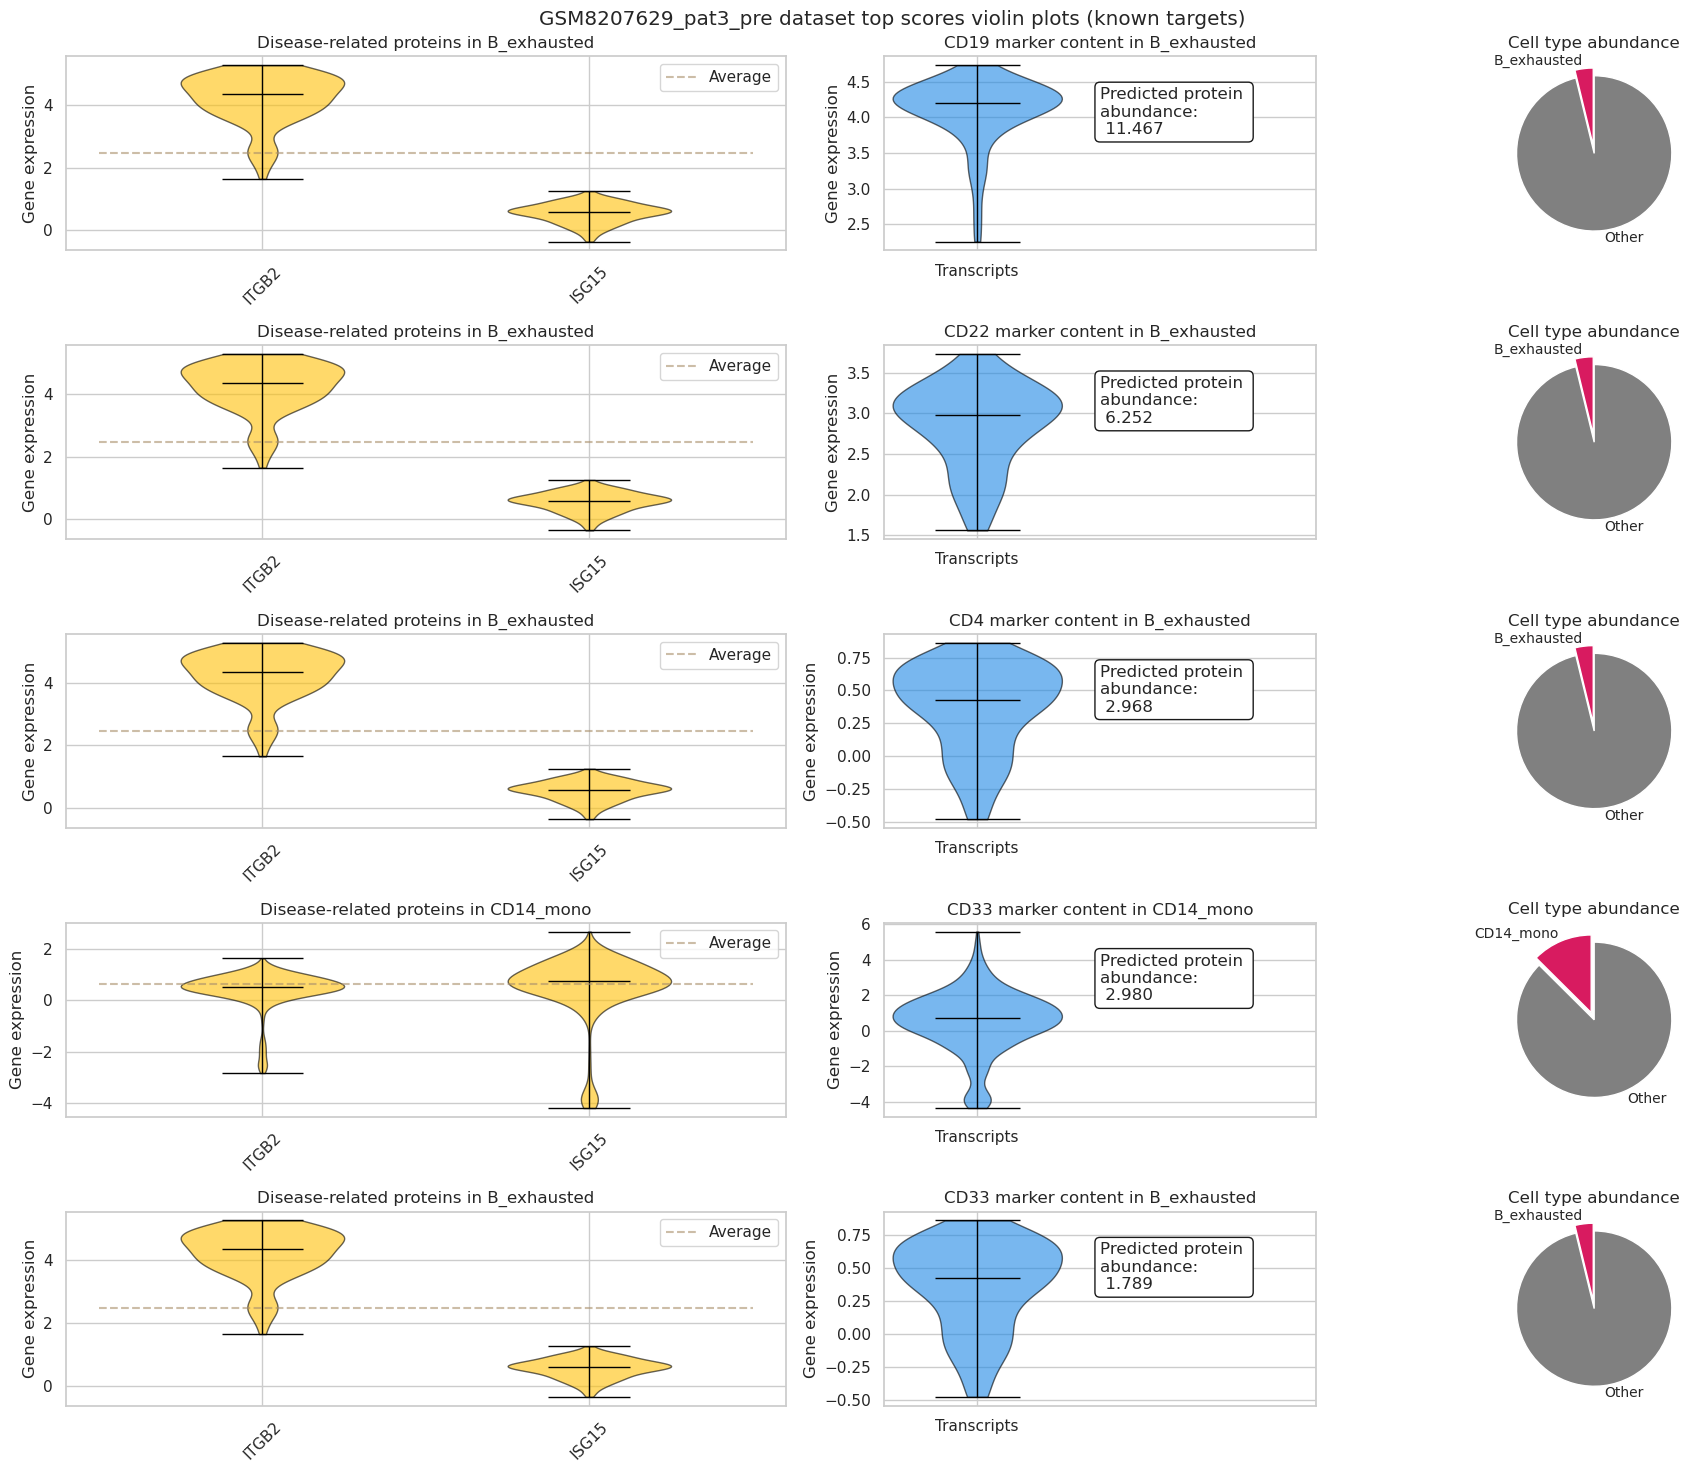

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

only_famous_targets=True
n=5

# Assuming the necessary variables (adata, cellMatrix, cellTypes, surf_markers, etc.) are defined elsewhere

# Get top n scores in averagedMatrix with column and index names
if(only_famous_targets):
    usedMarkers_scoreMatrix=scoreMatrix.loc[:, scoreMatrix.columns.isin(repurposableTargets)].copy()
    top_scores = usedMarkers_scoreMatrix.unstack().sort_values(ascending=False).head(n)
else:
    top_scores = scoreMatrix.unstack().sort_values(ascending=False).head(n)
    
top_info = [(index[1], index[0], value) for index, value in top_scores.items()]

# Display the top n scores with column and index names
print("Top " + str(n) + " Scores for " + str(upregProts) + ":")
fig, axs = plt.subplots(nrows=n, ncols=3, figsize=(18, 3*n), gridspec_kw={'width_ratios': [1*len(upregProts), 1.2,1]})
i = 0

for cell_t, marker, score in top_info:
    if marker in repurposableTargets:
        repurp = "\tTested for cancer"
    else:
        repurp = ""

    # Get the data to be plotted in the violin plot
    violin_data_1 = [cellMatrix.loc[cellMatrix['cell_type'] == cell_t, prot] for prot in upregProts]
    violin_data_2 = cellMatrix.loc[cellMatrix['cell_type'] == cell_t, marker]

    # Plot the combined violin plot for multiple upregProts
    violin_parts_1 = axs[i, 0].violinplot(violin_data_1, showmedians=True, showextrema=True)
    axs[i, 0].set_xticks(np.arange(1, len(upregProts) + 1))
    axs[i, 0].set_xticklabels(upregProts, rotation=45)
    axs[i, 0].set_title("Disease-related proteins in " + cell_t)
    axs[i, 0].set_ylabel("Gene expression")
    
    axs[i, 0].plot([0.5, len(upregProts)+0.5], [averagedMatrix.loc[cell_t, upregProts].mean(), averagedMatrix.loc[cell_t, upregProts].mean()], linestyle='dashed', color='#AB916D', alpha=0.6, label="Average")
    axs[i, 0].legend()
    # Customize violin plot colors
    for j, pc in enumerate(violin_parts_1['bodies']):
        pc.set_facecolor('#FFC107')
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
        vp = violin_parts_1[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Plot the second violin plot
    violin_parts_2 = axs[i, 1].violinplot([violin_data_2], showmedians=True, showextrema=True)
    axs[i, 1].set_xticks([1, 2])
    axs[i, 1].set_xticklabels(["Transcripts", ""])
    axs[i, 1].set_title(marker + " marker content in " + cell_t)
    axs[i, 1].set_ylabel("Gene expression")
    
    axs[i, 1].annotate(f"Predicted protein \nabundance:\n{abundanceMatrix.loc[cell_t, marker]: .3f}", xy=(0.5, 0.6), xycoords=axs[i, 1].transAxes, bbox=dict(boxstyle="round", fc="w", edgecolor='k'))

    for pc in violin_parts_2['bodies']:
        pc.set_facecolor('#1E88E5')
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
        vp = violin_parts_2[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Plot the pie chart
    piechart = axs[i, 2].pie([sums[cellTypes.index(cell_t)], 1 - sums[cellTypes.index(cell_t)]],
                             labels=[cell_t, "Other"], colors=['#D81B60', 'grey'],
                             startangle=90, explode=[0.1, 0],
                             textprops={'size': 'smaller'})
    axs[i, 2].set_title("Cell type abundance")

    print(f"Cell type: {cell_t}, Surface marker: {marker}, Value: {score:.7f}" + repurp)
    i += 1

if(only_famous_targets):
    known_targets_only="_known_targets_only"
    fig.suptitle(dataset + " dataset top scores violin plots (known targets)")
else:
    known_targets_only=""
    fig.suptitle(dataset + " dataset top scores violin plots")
    

plt.tight_layout()
plt.show()

fig.savefig(dataset + "_violin"+known_targets_only+".png", bbox_inches='tight')


In [36]:
def orgMyPlots(subPlotsCount, columns=3):
    rows=np.ceil(float(subPlotsCount)/columns)
    x_ind=[]
    y_ind=[]
    
    for i in range(subPlotsCount):
        x_ind.append(i%columns)
        y_ind.append(int(np.floor(i/columns)))
    return x_ind, y_ind

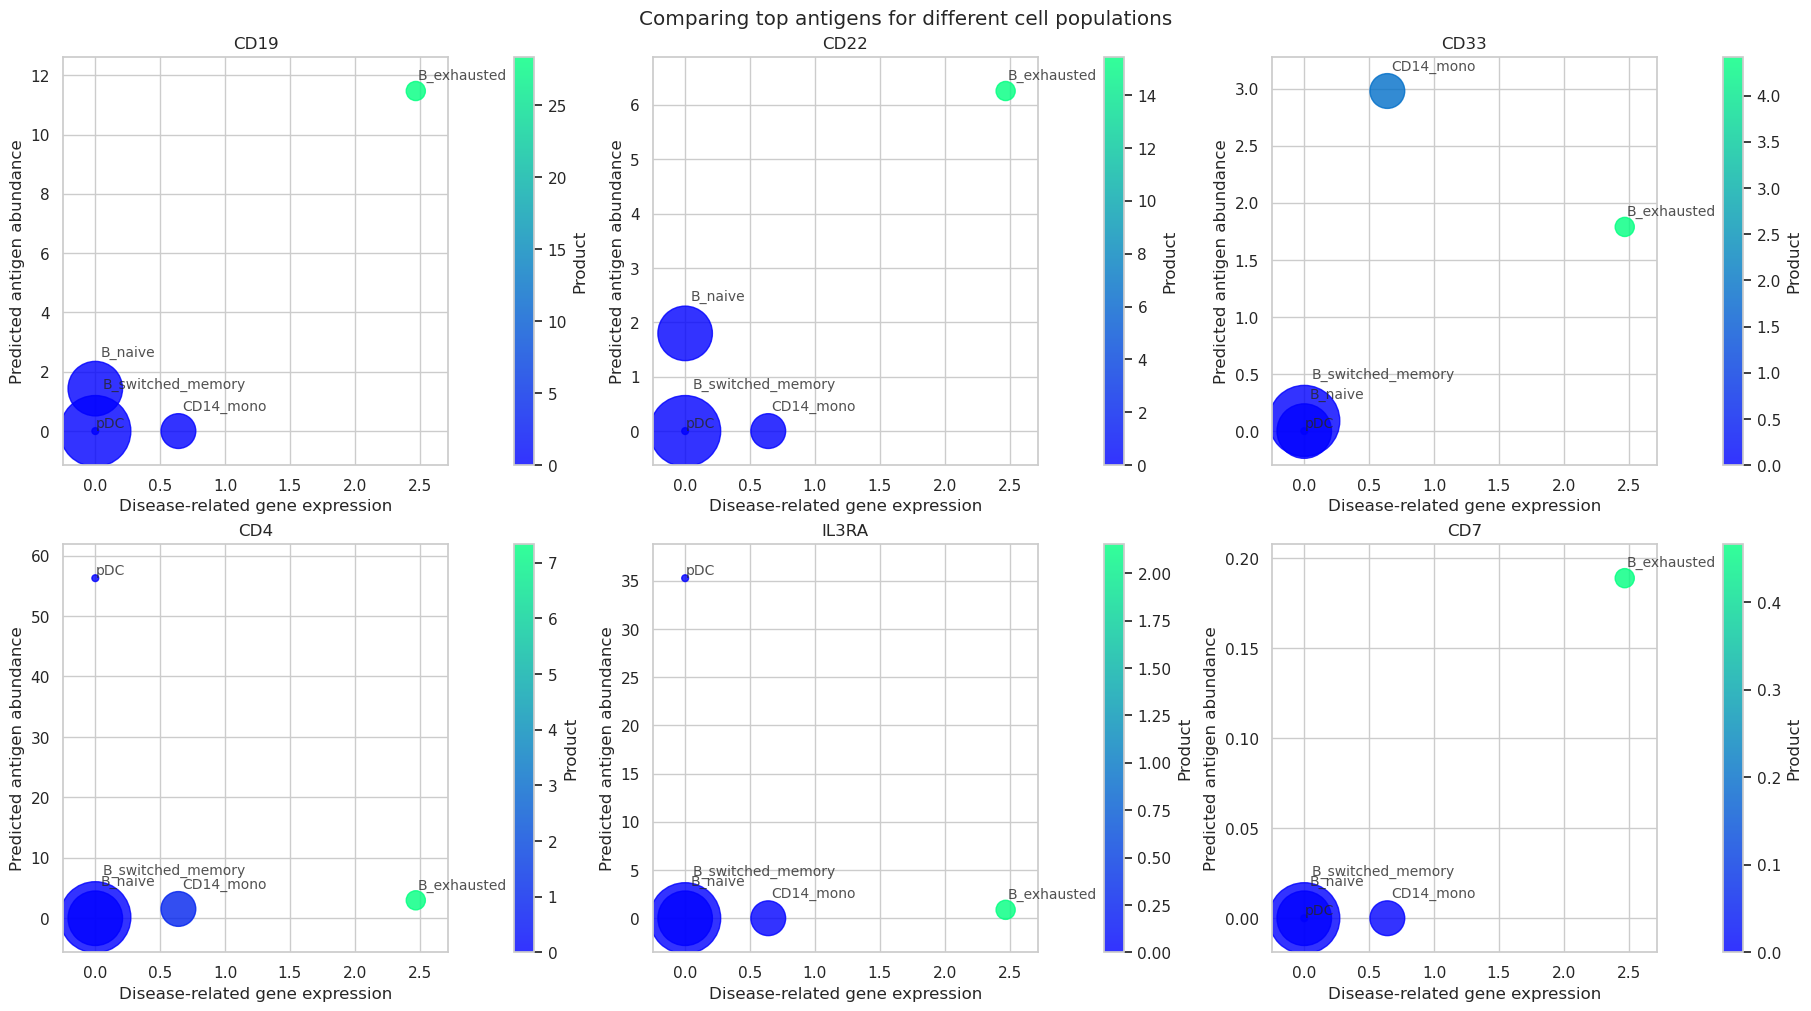

In [45]:
import matplotlib.pyplot as plt
import numpy as np

only_famous_targets=True
n=6

x_ind, y_ind = orgMyPlots(n, 3)
x_ind = [round(i) for i in x_ind]
y_ind = [round(i) for i in y_ind]

ranked_antigens = scoreMatrix.sum(axis=0)
if only_famous_targets:
    ranked_antigens = ranked_antigens.loc[ranked_antigens.index.isin(repurposableTargets)]

ranked_antigens.sort_values(ascending=False, inplace=True)
ranked_antigens = ranked_antigens.head(n)

fig, ax = plt.subplots(int(max(y_ind))+1, int(max(x_ind))+1, figsize=(18,10), layout='constrained')

for i, marker in enumerate(ranked_antigens.index):
    sizes = sums
    x = upregProts_effective
    y = abundanceMatrix[marker]
    c = x * y
    pcm = ax[y_ind[i], x_ind[i]].scatter(x, y, s=sizes*5000, alpha=0.8, cmap='winter', c=c)
    
    # Calculate padding
    x_pad = (x.max() - x.min()) * 0.1
    y_pad = (y.max() - y.min()) * 0.1
    
    # Set limits with padding
    ax[y_ind[i], x_ind[i]].set_xlim(x.min() - x_pad, x.max() + x_pad)
    ax[y_ind[i], x_ind[i]].set_ylim(y.min() - y_pad, y.max() + y_pad)
    
    for xi, yi, size, text in zip(x, y, sizes, y.index):
        ax[y_ind[i], x_ind[i]].annotate(text,
                    xy=(xi, yi), xycoords='data',
                    xytext=(0.1 * np.sqrt(size * 5000), 0.6 * np.sqrt(size * 5000)), 
                    textcoords='offset points',
                    alpha=0.8, size=10)
    
    ax[y_ind[i], x_ind[i]].set_xlabel("Disease-related gene expression")
    ax[y_ind[i], x_ind[i]].set_ylabel("Predicted antigen abundance")
    ax[y_ind[i], x_ind[i]].set_title(marker)
    
    # Add a colorbar for each subplot
    cbar = fig.colorbar(pcm, ax=ax[y_ind[i], x_ind[i]], pad=0.02, orientation='vertical')
    cbar.set_label("Product")

fig.suptitle("Comparing top antigens for different cell populations")

fig.savefig("Sensitivity_and_Specificity_Antigen_Comparison_Plot.png", bbox_inches='tight')
fig.show()


In [38]:
'''import matplotlib.pyplot as plt
import numpy as np

only_famous_targets=True
n=6

x_ind, y_ind = orgMyPlots(n, 3)
x_ind = [round(i) for i in x_ind]
y_ind = [round(i) for i in y_ind]

ranked_antigens = scoreMatrix.sum(axis=0)
if only_famous_targets:
    ranked_antigens = ranked_antigens.loc[ranked_antigens.index.isin(repurposableTargets)]

ranked_antigens.sort_values(ascending=False, inplace=True)
ranked_antigens = ranked_antigens.head(n)

fig, ax = plt.subplots(int(max(y_ind))+1, int(max(x_ind))+1, figsize=(18,10), layout='constrained')

highest_prod = 0
all_x = []
all_y = []
all_c = []

for i, marker in enumerate(ranked_antigens.index):
    sizes = sums
    x = upregProts_effective
    y = abundanceMatrix[marker]
    c = x * y
    pcm = ax[y_ind[i], x_ind[i]].scatter(x, y, s=sizes*5000, alpha=0.8, cmap='winter', c=c)
    
    all_x.extend(x)
    all_y.extend(y)
    all_c.extend(c)
    
    # Calculate padding
    x_pad = (x.max() - x.min()) * 0.1
    y_pad = (y.max() - y.min()) * 0.1
    
    # Set limits with padding
    ax[y_ind[i], x_ind[i]].set_xlim(x.min() - x_pad, x.max() + x_pad)
    ax[y_ind[i], x_ind[i]].set_ylim(y.min() - y_pad, y.max() + y_pad)
    
    for xi, yi, size, text in zip(x, y, sizes, y.index):
        ax[y_ind[i], x_ind[i]].annotate(text,
                    xy=(xi, yi), xycoords='data',
                    xytext=(0.1 * np.sqrt(size * 5000), 0.6 * np.sqrt(size * 5000)), 
                    textcoords='offset points',
                    alpha=0.8, size=10)
    
    ax[y_ind[i], x_ind[i]].set_xlabel("Disease-related gene expression")
    ax[y_ind[i], x_ind[i]].set_ylabel("Predicted antigen abundance")
    ax[y_ind[i], x_ind[i]].set_title(marker)

# Determine the common color scale based on all subplots
vmin = min(all_c)
vmax = max(all_c)

# Add colorbar with common scale
for a in ax.flat:
    pcm = a.collections[0]
    pcm.set_clim(vmin, vmax)

fig.colorbar(ax[y_ind[0], x_ind[0]].collections[0], ax=ax, label="Product")

fig.suptitle("Comparing top antigens for different cell populations")

fig.savefig("Sensitivity_and_Specificity_Antigen_Comparison_Plot_Known_Targets.png", bbox_inches='tight')
fig.show()
'''

'import matplotlib.pyplot as plt\nimport numpy as np\n\nonly_famous_targets=True\nn=6\n\nx_ind, y_ind = orgMyPlots(n, 3)\nx_ind = [round(i) for i in x_ind]\ny_ind = [round(i) for i in y_ind]\n\nranked_antigens = scoreMatrix.sum(axis=0)\nif only_famous_targets:\n    ranked_antigens = ranked_antigens.loc[ranked_antigens.index.isin(repurposableTargets)]\n\nranked_antigens.sort_values(ascending=False, inplace=True)\nranked_antigens = ranked_antigens.head(n)\n\nfig, ax = plt.subplots(int(max(y_ind))+1, int(max(x_ind))+1, figsize=(18,10), layout=\'constrained\')\n\nhighest_prod = 0\nall_x = []\nall_y = []\nall_c = []\n\nfor i, marker in enumerate(ranked_antigens.index):\n    sizes = sums\n    x = upregProts_effective\n    y = abundanceMatrix[marker]\n    c = x * y\n    pcm = ax[y_ind[i], x_ind[i]].scatter(x, y, s=sizes*5000, alpha=0.8, cmap=\'winter\', c=c)\n    \n    all_x.extend(x)\n    all_y.extend(y)\n    all_c.extend(c)\n    \n    # Calculate padding\n    x_pad = (x.max() - x.min()) * 0

In [39]:
'''only_famous_targets=True
n=6

x_ind, y_ind=orgMyPlots(n,3)
x_ind=[round(i) for i in x_ind]
y_ind=[round(i) for i in y_ind]

ranked_antigens=scoreMatrix.sum(axis=0)
if(only_famous_targets):
    ranked_antigens=ranked_antigens.loc[ranked_antigens.index.isin(repurposableTargets)]

ranked_antigens.sort_values(ascending=False, inplace=True)
ranked_antigens=ranked_antigens.head(n)

fig,ax=plt.subplots(int(max(y_ind))+1, int(max(x_ind))+1, figsize=(18,10), layout='constrained')                     

highest_prod_ax=None
highest_prod=0
for i, marker in enumerate(ranked_antigens.index):
    sizes=sums
    x=upregProts_effective
    y=abundanceMatrix[marker]
    pcm=ax[y_ind[i],x_ind[i]].scatter(x,y,s=sizes*5000, alpha=0.8, cmap='winter', c=x*y)
    if(max(x*y)>highest_prod):
        highest_prod_ax=pcm
        highest_prod=max(x*y)
    # Calculate padding
    x_pad = (x.max() - x.min()) * 0.1
    y_pad = (y.max() - y.min()) * 0.1
    
    # Set limits with padding
    
    ax[y_ind[i],x_ind[i]].set_xlim(x.min() - x_pad, x.max() + x_pad)
    ax[y_ind[i],x_ind[i]].set_ylim(y.min() - y_pad, y.max() + y_pad)
    
    for xi, yi, size, text in zip(x, y, sizes, y.index):
        ax[y_ind[i],x_ind[i]].annotate(text,
                    xy=(xi, yi), xycoords='data',
                    xytext=(0.1 * np.sqrt(size * 5000), 0.6 * np.sqrt(size * 5000)), 
                    textcoords='offset points',
                    alpha=0.8, size=10)
    ax[y_ind[i],x_ind[i]].set_xlabel("Disease-related gene expression")
    ax[y_ind[i],x_ind[i]].set_ylabel("Predicted antigen abundance")
    ax[y_ind[i],x_ind[i]].set_title(marker)
    #ax[x_ind[i],y_ind[i]].colorbar(label="Product")
fig.colorbar(highest_prod_ax, ax=ax, label="Product")
fig.suptitle("Comparing top antigens for different cell populations")

fig.savefig("Sensitivity_and_Specificity_Antigen_Comparison_Plot_Known_Targets.png", bbox_inches='tight')
fig.show()'''

'only_famous_targets=True\nn=6\n\nx_ind, y_ind=orgMyPlots(n,3)\nx_ind=[round(i) for i in x_ind]\ny_ind=[round(i) for i in y_ind]\n\nranked_antigens=scoreMatrix.sum(axis=0)\nif(only_famous_targets):\n    ranked_antigens=ranked_antigens.loc[ranked_antigens.index.isin(repurposableTargets)]\n\nranked_antigens.sort_values(ascending=False, inplace=True)\nranked_antigens=ranked_antigens.head(n)\n\nfig,ax=plt.subplots(int(max(y_ind))+1, int(max(x_ind))+1, figsize=(18,10), layout=\'constrained\')                     \n\nhighest_prod_ax=None\nhighest_prod=0\nfor i, marker in enumerate(ranked_antigens.index):\n    sizes=sums\n    x=upregProts_effective\n    y=abundanceMatrix[marker]\n    pcm=ax[y_ind[i],x_ind[i]].scatter(x,y,s=sizes*5000, alpha=0.8, cmap=\'winter\', c=x*y)\n    if(max(x*y)>highest_prod):\n        highest_prod_ax=pcm\n        highest_prod=max(x*y)\n    # Calculate padding\n    x_pad = (x.max() - x.min()) * 0.1\n    y_pad = (y.max() - y.min()) * 0.1\n    \n    # Set limits with pad

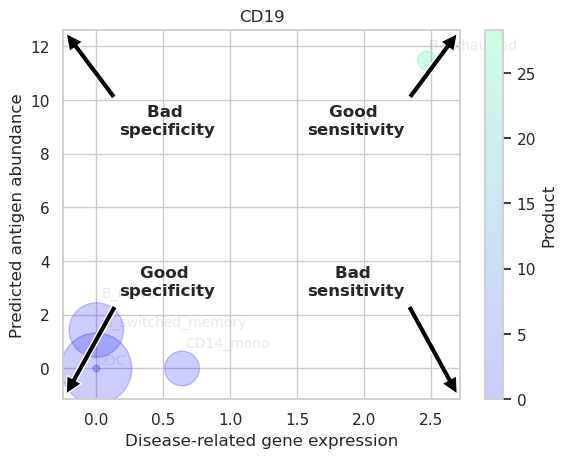

In [40]:
import matplotlib.pyplot as plt
import numpy as np

only_famous_targets = True
n = 1

ranked_antigens = scoreMatrix.sum(axis=0)
if only_famous_targets:
    ranked_antigens = ranked_antigens.loc[ranked_antigens.index.isin(repurposableTargets)]

ranked_antigens.sort_values(ascending=False, inplace=True)
ranked_antigens = ranked_antigens.head(n)
   
for marker in ranked_antigens.index:
    sizes = sums
    x = upregProts_effective
    y = abundanceMatrix[marker]
    
    plt.scatter(x, y, s=sizes * 5000, alpha=0.2, cmap='winter', c=x * y)
    
    # Calculate padding
    x_pad = (x.max() - x.min()) * 0.1
    y_pad = (y.max() - y.min()) * 0.1
    
    # Set limits with padding
    plt.xlim(x.min() - x_pad, x.max() + x_pad)
    plt.ylim(y.min() - y_pad, y.max() + y_pad)
    
    # Annotate each point
    for xi, yi, size, text in zip(x, y, sizes, y.index):
        plt.annotate(text,
                     xy=(xi, yi), xycoords='data',
                     xytext=(0.1 * np.sqrt(size * 5000), 0.6 * np.sqrt(size * 5000)), 
                     textcoords='offset points',
                     alpha=0.1, size=10)

    # Add arrows to the corners
    corners = {
        "Bad \nspecificity": (x.min() - x_pad, y.max() + y_pad),
        "Good \nsensitivity": (x.max() + x_pad, y.max() + y_pad),
        "Good \nspecificity": (x.min() - x_pad, y.min() - y_pad),
        "Bad \nsensitivity": (x.max() + x_pad, y.min() - y_pad)
    }
    
    for (corner_name, (cx, cy)) in corners.items():
        if(cx)<=0:
            x_offset=75
        else:
            x_offset=-75
        if(cy)<=0:
            y_offset=75
        else:
            y_offset=-75
        plt.annotate(corner_name,
                     xy=(cx, cy), xycoords='data',
                     xytext=(x_offset, y_offset), textcoords='offset points',
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=12, weight='bold', ha='center')
    
    plt.xlabel("Disease-related gene expression")
    plt.ylabel("Predicted antigen abundance")
    plt.title(marker)
    plt.colorbar(label="Product")
    
    plt.savefig("Sensitivity_and_Specificity_Plot.png", bbox_inches='tight')
    plt.show()

In [41]:
import zipfile
import os

zipfile_name=dataset+"_Figures.zip"
directory = output_directory+"/"  # The directory to search in

# Find the files that contain the search string
files_to_zip = [f for f in os.listdir(directory) if dataset in f and not "zip" in f]

# Create the zip file and add the filtered files
with zipfile.ZipFile(zipfile_name, 'w') as zipf:
    for file in files_to_zip:
        zipf.write(os.path.join(directory, file), arcname=file)

In [42]:
#!rm GSM3666108_SC136SSCUP_Figures.zip
